<a href="https://colab.research.google.com/github/BellaDir/Astro-Data/blob/main/Milky_Way_Rotation_Curve.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import astropy.constants as ac # Imports a Python package to call the value of certain constants
import astropy.units as u # Imports a Python package to call certain units, ex. the mass of the sun
import numpy as np # Imports a Python package to call certain mathematical functions

In [4]:
def calculatingOrbitalVelocity(M, R):
    """
    This is a function that calculates the orbital velocity.
    Input:
    M, the mass of the central object
    R, the orbital radius of the satellite
    Output:
    orbitalVelocity, the orbital velocity of the satellite
    """
    orbitalVelocity = np.sqrt(ac.G * M / R)
    return orbitalVelocity

In [5]:
M_bulge = 1e10 * u.solMass # Defines the mass of the buldge

In [6]:
R_arr = np.arange(1, 30) * u.kpc # Defines an array of orbital radius
v_arr = calculatingOrbitalVelocity(M_bulge, R_arr) # Gives us the orbital velocity array
print(v_arr.to(u.km/u.s)) # Prints the array


[207.3865297  146.64442148 119.73466875 103.69326485  92.7460756
  84.66519621  78.38474041  73.32221074  69.12884323  65.58137899
  62.52939142  59.86733437  57.51867436  55.42638148  53.54697172
  51.84663242  50.2986216   48.88147383  47.57773291  46.3730378
  45.25545097  44.21495669  43.24308072  42.33259811  41.47730594
  40.67184468  39.91155625  39.1923702   38.51071177] km / s


In [7]:
import matplotlib.pyplot as plt # Imports the plotting library

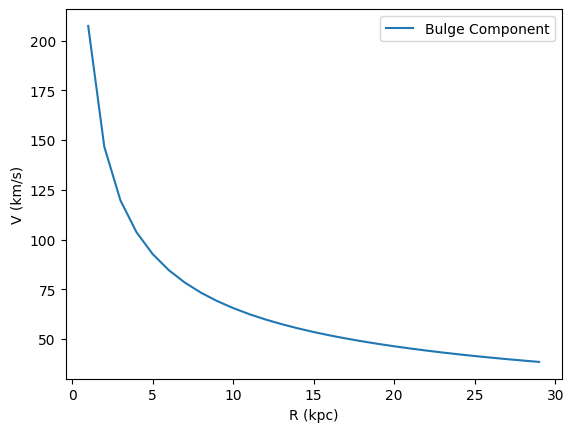

In [8]:
plt.plot(R_arr.to(u.kpc), v_arr.to(u.km/u.s), label="Bulge Component") # Plots the orbital velocity due to the buldge component

# Makes labels and a legend for the graph
plt.xlabel('R (kpc)')
plt.ylabel('V (km/s)')
plt.legend()
plt.show()

In [9]:
M_disk = 1e11 * u.solMass # Defines the disk total mass
R_disk = 10 * u.kpc # Defines the outer edge of disk radius
density_disk = M_disk / (np.pi * (R_disk**2)) # Gives us the disk density
print(density_disk.to(1e6 * u.solMass/u.kpc**2)) # Prints the disk density

318.3098861837907 1e+06 solMass / kpc2


In [10]:
def calculatingEnclosedMassForDisk(R, density=318 * 1e6 * u.solMass/u.kpc**2):
    """
    Calculate enclosed mass for the disk component
    Input: R - orbital radius, density - density of the disk as calculated above
    Output: M - enclosed mass
    """
    if R < 10 * u.kpc:
        M = np.pi * (R**2) * density
    else:
        R = 10 * u.kpc # Any radius larger than 10 kpc is trucated at 10 kpc because of the extent of the disk component
        M = np.pi * (R**2) * density
    return(M)

In [11]:
def calculatingEnclosedMassForMilkyWay(R, density_disk=318 * 1e6 * u.solMass/u.kpc**2, M_bulge = 1e10 * u.solMass): # Function that give us the enclosed mass of the Milky Way (only considering the disk and buldge components thus far)
    M_disk = calculatingEnclosedMassForDisk(R, density=density_disk) # Calculates the enclosed mass of the disk component
    M_total = M_disk + M_bulge # Gives us the total mass of the disk and buldge components
    return(M_total)

In [12]:
v_bulge_arr = calculatingOrbitalVelocity(M_bulge, R_arr) # Gives us an orbital velocity array for the buldge component

In [13]:
M_disk = np.zeros(len(R_arr)) * u.solMass # Gives us a mass array for disk component
M_total = np.zeros(len(R_arr)) * u.solMass # Gives us a mass array for total mass

for i in np.arange(len(R_arr)): # Calculates enclosed masses for the disk component as well as the total
    M_disk[i] = calculatingEnclosedMassForDisk(R_arr[i])
    M_total[i] = calculatingEnclosedMassForMilkyWay(R_arr[i])

v_disk_arr = calculatingOrbitalVelocity(M_disk, R_arr) # Gives us an array for the orbital velocity due to the disk component
v_bulge_disk_arr = calculatingOrbitalVelocity(M_total, R_arr)  # Gives us an array for the orbital velocity due to both the buldge and disk components

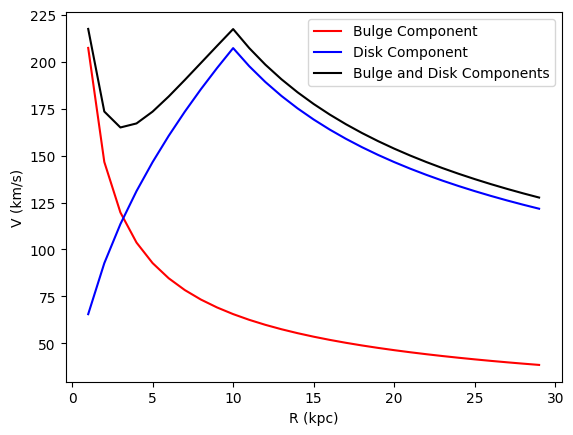

In [14]:
plt.plot(R_arr.to(u.kpc), v_arr.to(u.km/u.s), color="red", label="Bulge Component") # Plots the bulge component
plt.plot(R_arr.to(u.kpc), v_disk_arr.to(u.km/u.s), color="blue", label="Disk Component") # Plots the disk component
plt.plot(R_arr.to(u.kpc), v_bulge_disk_arr.to(u.km/u.s), color="black", label="Bulge and Disk Components") # Plots the combine bulge and disk components
plt.xlabel('R (kpc)')

# Makes labels and a legend for the graph
plt.ylabel('V (km/s)')
plt.legend()
plt.show()

In [15]:
M_halo = 1e12 * u.solMass # Defines halo mass
R_halo = 162 * u.kpc # Defines halo radius
density_halo = M_halo / (4/3 * np.pi * (R_halo**3)) # Calculates halo density
print(density_halo.to(1e6 * u.solMass/u.kpc**3)) # Prints the halo density

0.0561521445084786 1e+06 solMass / kpc3


In [34]:
def calculatingEnclosedMassForHalo(R, rho_0=0.01 * u.solMass/u.pc**3, R_h=30 * u.kpc): # Function that calculates enclosed halo mass
   if R < R_h:
        M_halo = (4/3) * np.pi * R**3 * rho_0.to(u.solMass/u.kpc**3)
   else:
        M_halo = (4/3) * np.pi * R_h**3 * rho_0.to(u.solMass/u.kpc**3)  # Truncate at R_h
   return M_halo

In [55]:
def calculatingEnclosedMassForMilkyWay(R, density_disk=318 * 1e6 * u.solMass/u.kpc**2, M_bulge=1e10 * u.solMass): # Function that calculates the total enclosed Milky Way mass
   M_disk = calculatingEnclosedMassForDisk(R, density=density_disk) # Calculates mass of the disk component
   M_halo = calculatingEnclosedMassForHalo(R) # Calculates mass of the halo component
   M_total = M_bulge + M_disk + M_halo # Calculates the total mass including each component of the Milky Way galaxy
   return M_total

In [56]:
v_bulge_arr = calculatingOrbitalVelocity(M_bulge, R_arr) # Gives us an array of the orbital velocities caused by the buldge component of the Milky Way

In [57]:
M_disk = np.zeros(len(R_arr)) * u.solMass # Gives us a disk mass array
M_total = np.zeros(len(R_arr)) * u.solMass # Gives us a total mass array

In [58]:
for i in np.arange(len(R_arr)):
    M_disk[i] = calculatingEnclosedMassForDisk(R_arr[i]) # Calculates the enclosed mass of the disk component
    M_total[i] = calculatingEnclosedMassForMilkyWay(R_arr[i]) # Calculates the enclosed mass of the Milky Way

In [59]:
v_disk_arr = calculatingOrbitalVelocity(M_disk, R_arr) # Gives us the orbital velocity array due to the disk component
v_halo_arr = calculatingOrbitalVelocity(M_halo, R_arr) # Gives us the orbital velocity array due to the halo component
v_total_arr = calculatingOrbitalVelocity(M_total, R_arr) # Gives us the orbital velocity array due to the total mass

In [47]:
from google.colab import files # Function to import the data set
uploaded = files.upload()

Saving galaxy_rotation_2006.txt to galaxy_rotation_2006 (1).txt


In [60]:
import astropy.io.ascii # Imports a python package to read the imported data set
tab = astropy.io.ascii.read("galaxy_rotation_2006.txt")

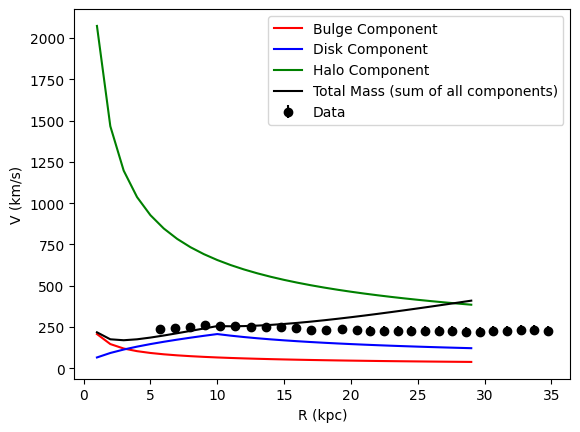

In [61]:
plt.plot(R_arr.to(u.kpc), v_bulge_arr.to(u.km/u.s), color="red", label="Bulge Component") # Plots orbital velocity due to the buldge component
plt.plot(R_arr.to(u.kpc), v_disk_arr.to(u.km/u.s), color="blue", label="Disk Component") # Plots orbital velocity due to the disk component
plt.plot(R_arr.to(u.kpc), v_halo_arr.to(u.km/u.s), color="green", label="Halo Component") # Plots orbital velocity due to the halo comopnent
plt.plot(R_arr.to(u.kpc), v_total_arr.to(u.km/u.s), color="black", label="Total Mass (sum of all components)") # Plots orbital velocity due to the total mass

plt.errorbar(tab["col2"], tab["col3"], yerr=tab["col4"], ecolor="black", color="black", fmt='o', label="Data") # Plots the imported data set, along with an error bar

# Makes labels and a legend for the graph
plt.xlabel('R (kpc)')
plt.ylabel('V (km/s)')
plt.legend()
plt.show()